# Pergunta 05

## Aluno: José Rafael de Oliveira Neto

### Descrição da Atividade: 

Desenvolva um script em Python utilizando o Scikit-learn para treinar uma Rede Neural Perceptron Multicamada (Multi-layer Perceptron) para determinar se um Cancer é Maligno ou Benigno, a partir da base de dados de Cancer de Mama (Breast Cancer Data Set), disponível no Scikit-learn e acessado com o código:

In [18]:
# Importandndo as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
plt.style.use('ggplot')

#Importando a base de dados: Breast Cancer Dataset e printando os feature_names & target_names

data = load_breast_cancer()
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [2]:
#Lendo a base de dados

df = pd.read_csv('../input/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Informações do Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Removendo a última coluna, não precisamos delas

df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
#Vamos visualizar quantos valores para câncer maligno e benigno

print ("O número total de diagnóstico são ", str(df.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Benigno e maligno são",
       df.diagnosis.value_counts()['M'])

O número total de diagnóstico são  569 ,  357 Benigno e maligno são 212


## Resultado

### Malígno: 212
### Benígno: 357
### Total: 569

In [6]:
# Describe

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#Esse conjunto de dados já contem os valóres médios para todas as colunas

featureMeans = list(df.columns[1:11])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


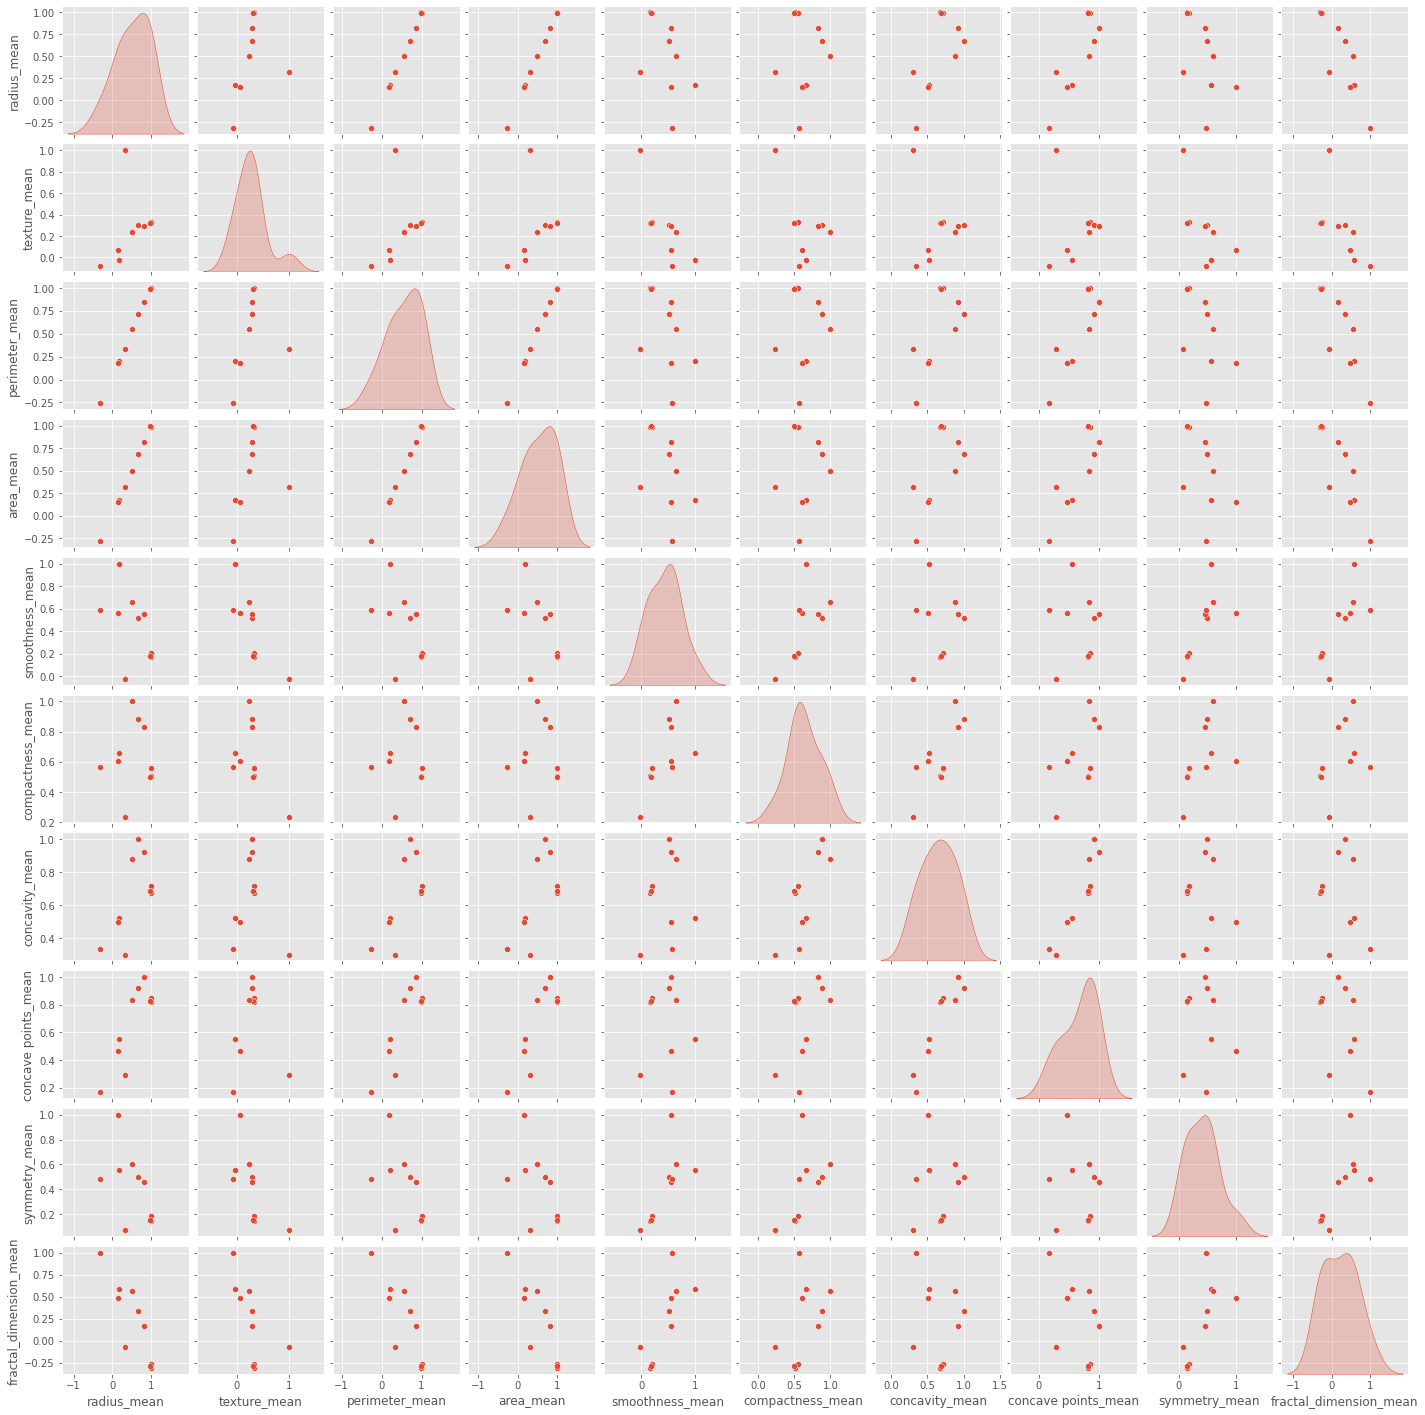

In [8]:
#Vamos observar a correlação entre as colunas

import seaborn as sns
correlationData = df[featureMeans].corr()
sns.pairplot(df[featureMeans].corr(), diag_kind='kde', size=2);

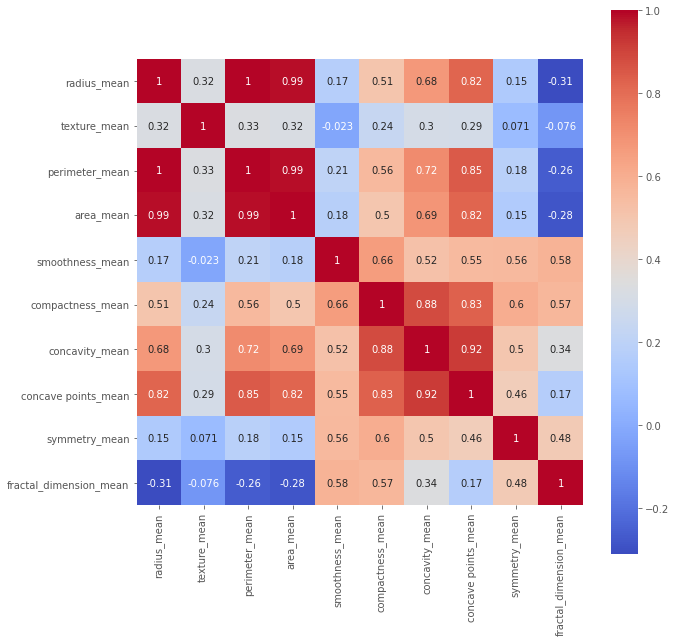

In [9]:
#O pairplot ficou muito grande e bastante complicado de entender, vamos tentar visualizar melhor com o heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

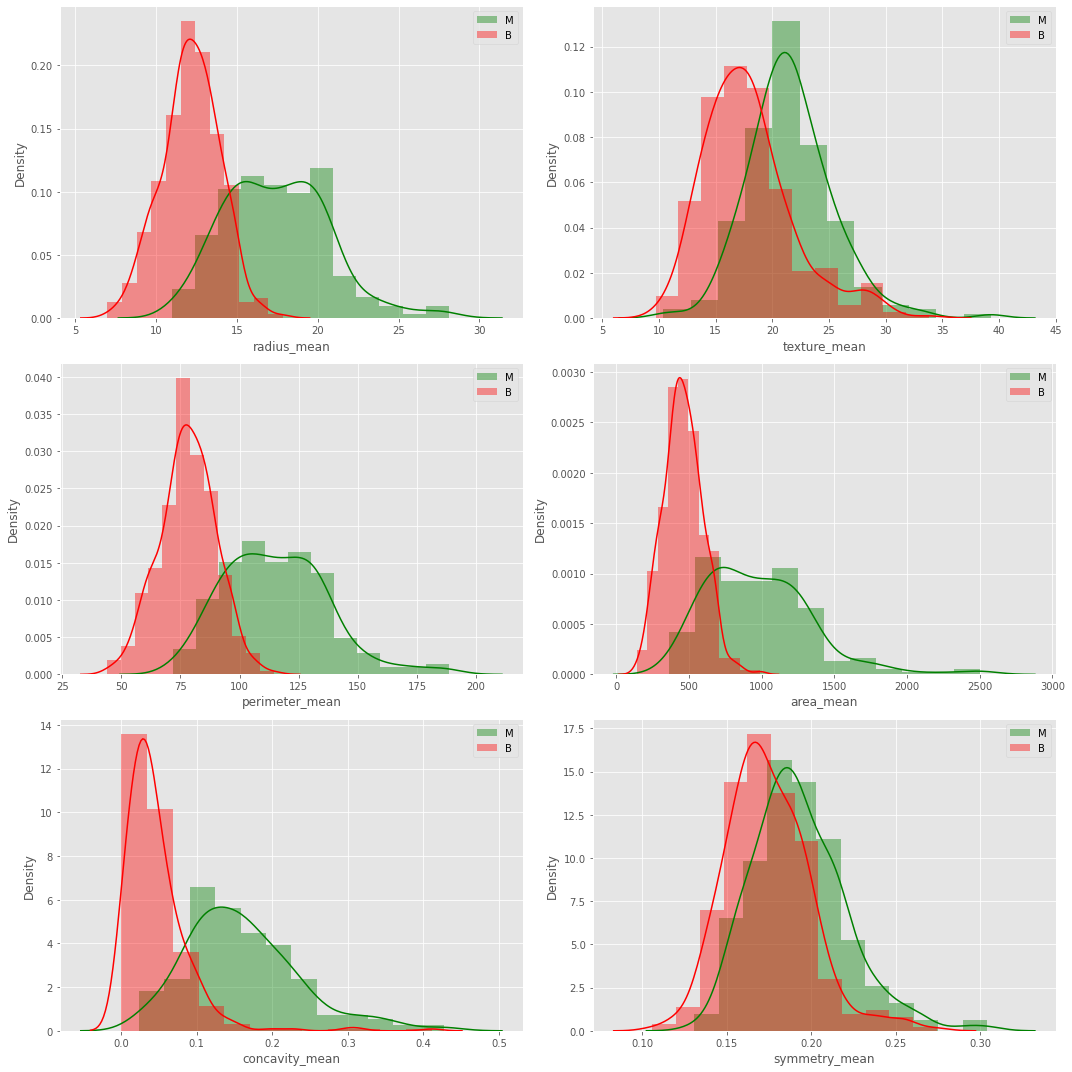

In [10]:
#Vamos traçar a distribuição de cada tipo de diagnóstico para algumas das características médias

bins = 12
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
sns.distplot(df[df['diagnosis']=='M']['radius_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['radius_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 2)
sns.distplot(df[df['diagnosis']=='M']['texture_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['texture_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 3)
sns.distplot(df[df['diagnosis']=='M']['perimeter_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['perimeter_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 4)
sns.distplot(df[df['diagnosis']=='M']['area_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['area_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 5)
sns.distplot(df[df['diagnosis']=='M']['concavity_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['concavity_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.subplot(3, 2, 6)
sns.distplot(df[df['diagnosis']=='M']['symmetry_mean'], bins=bins, color='green', label='M')
sns.distplot(df[df['diagnosis']=='B']['symmetry_mean'], bins=bins, color='red', label='B')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [13]:
X = df.loc[:,featureMeans]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Com esses plots podemos começar a aplicar alguns modelos de machine learning

from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
predicted = nbclf.predict(X_test)
print('Breast cancer dataset')
print('Precisão do classificador GaussianNB no conjunto de treinamento: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Precisão do classificador GaussianNB no conjunto de teste: {:.2f}'.format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Precisão do classificador GaussianNB no conjunto de treinamento: 0.90
Precisão do classificador GaussianNB no conjunto de teste: 0.95


In [15]:
from sklearn import metrics

print("Relatório de classificação para classificador %s:\n%s\n"
      % (nbclf, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Relatório de classificação para classificador GaussianNB():
              precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion matrix:
[[70  1]
 [ 5 38]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Breast cancer dataset')
print('Precisão do classificador GaussianNB no conjunto de treinamento: {:.2f}'.format(clf.score(X_train, y_train)))
print('Precisão do classificador GaussianNB no conjunto de teste: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Relatório de classificação para classificador %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, prediction)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Breast cancer dataset
Precisão do classificador GaussianNB no conjunto de treinamento: 0.90
Precisão do classificador GaussianNB no conjunto de teste: 0.94

 Relatório de classificação para classificador KNeighborsClassifier():
              precision    recall  f1-score   support

           B       0.92      0.99      0.95        71
           M       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion matrix:
[[70  1]
 [ 6 37]]


# MLP

Vamos começar definindo a instância do Pipeline. Neste caso, usei três abordagens diferentes: Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer para pré-processamento de dados e MLPClassifier para classificação.

In [28]:
breast_cancer = pd.read_csv('../input/data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
# Features "id" and "Unnamed: 32" are not useful 
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# "diagnosis" feature is our class which I wanna predict
y = breast_cancer.diagnosis

In [30]:
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)

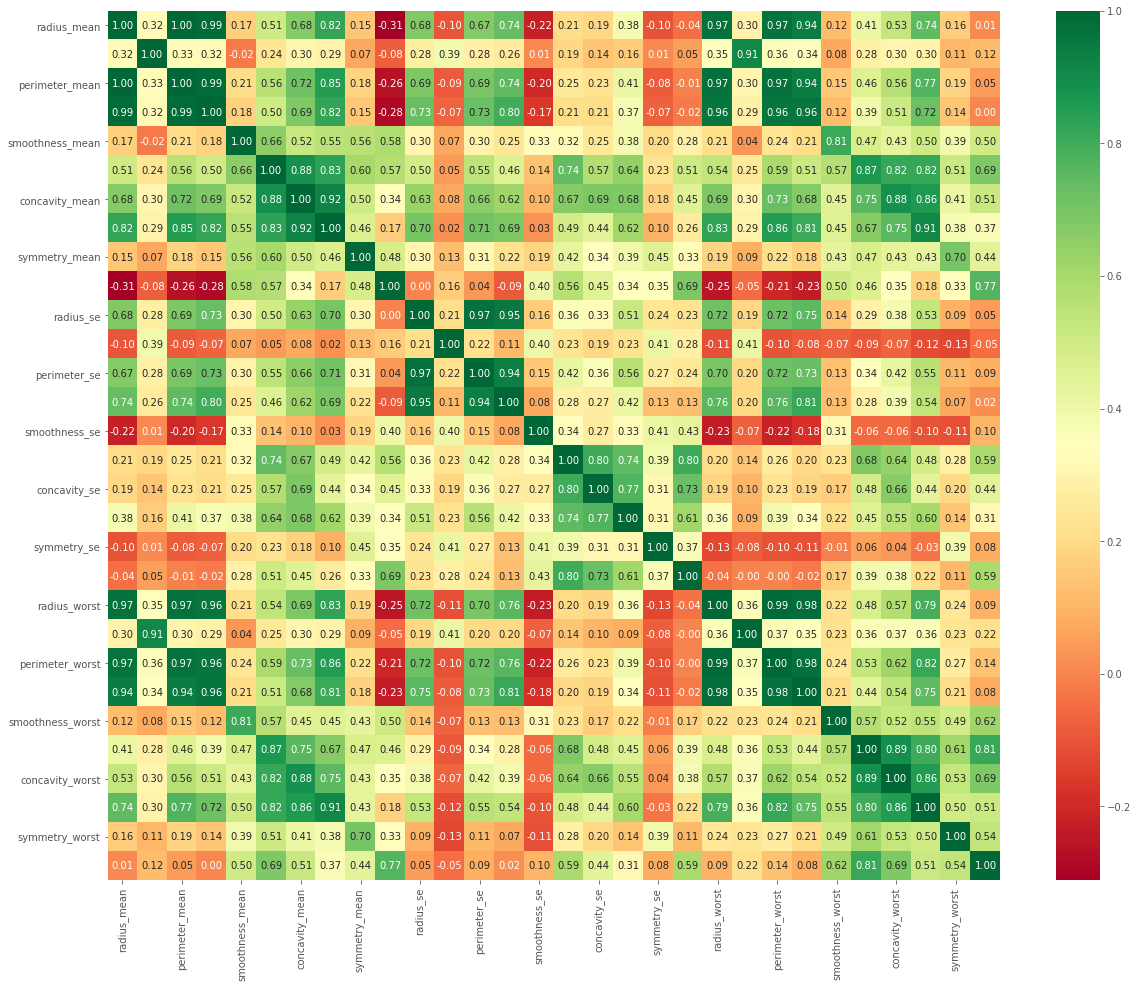

In [31]:
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(20, 16)

plt.show()

In [32]:
pipe = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('classification', MLPClassifier())
])

Em seguida, eu precisei preparar atributos com valores para as etapas acima que desejam verificar pelo processo de ajuste dos parâmetros do modelo: ativação, solucionador, max_iter e alfa.

In [33]:
random_state = 42
mlp_activation = ['identity', 'logistic', 'tanh', 'relu']
mlp_solver = ['lbfgs', 'sgd', 'adam']
mlp_max_iter = range(1000, 10000, 1000)
mlp_alpha = [1e-4, 1e-3, 0.01, 0.1, 1]
preprocess = [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

Em seguida, precisei preparar combinações com suporte para os parâmetros do classificador, incluindo os atributos acima. No caso do classificador Multi-layer Perceptron, decidi cancelar o PCA ou qualquer outra técnica de seleção de recursos.

In [34]:
mlp_param_grid = [
    {
        'preprocess': preprocess,
        'classification__activation': mlp_activation,
        'classification__solver': mlp_solver,
        'classification__random_state': [random_state],
        'classification__max_iter': mlp_max_iter,
        'classification__alpha': mlp_alpha
    }
]

## Avaliação de modelo

Finalmente, depois de algumas horas de computação, estabeleci os melhores valores de parâmetros que passei para novas instâncias de seleção de recursos e classificador. best_params retornou StandardScaler para pré-processamento de dados e 1000, 0.1, 'logistic' e 'adam' valores para max_iter, alpha, activation e atributos classifier solver.

O que mais, descobri que a função train_test_split deu a melhor pontuação F1 com divisão em torno de 32% dos dados para treinamento e 68% para teste.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.32
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(386, 30) (386,)
(183, 30) (183,)


In [36]:
scaler = StandardScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)
mlp.fit(X_train_scaler, y_train)

mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train_scaler, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))


Data preprocessing with StandardScaler()

MLP Accuracy: 99.45%
MLP AUC: 99.86%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      0.98      0.99        64

    accuracy                           0.99       183
   macro avg       1.00      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183

MLP Training set score: 98.45%
MLP Testing set score: 99.45%


# Confusion Matrix

<AxesSubplot:>

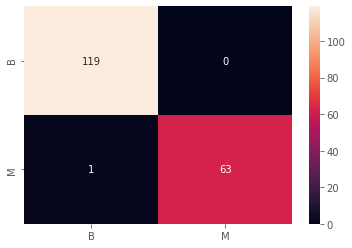

In [37]:
outcome_labels = sorted(df.diagnosis.unique())

# Confusion Matrix for MLPClassifier
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

## ROC

A curva ROC é um gráfico que ilustra a capacidade de diagnóstico de um sistema classificador binário conforme seu limite de discriminação é variado.

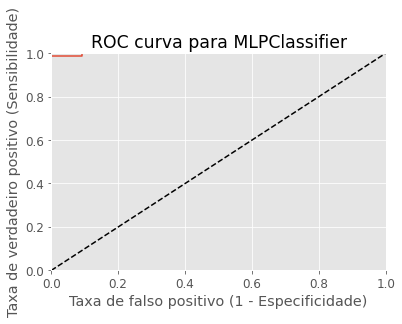

In [42]:
# ROC for MLPClassifier
fpr, tpr, thresholds = roc_curve(y_test, mlp_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curva para MLPClassifier')
plt.xlabel('Taxa de falso positivo (1 - Especificidade)')
plt.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
plt.grid(True)